# Mod 3, Lsn 4 #

## Relationships in Data ##

Now that you have a fairly large set of data, you now need to see if you can determine relationships within the data set.  We've hinted as this in the graphs, when we looked for relationships, but now let's do it formally.

The simplest relationship is probably correlation.  There are many 'flavors' of correlation, but let's stick to the basics.  A correlation quantifies the relationship between 2 variables, and ranges between -1 and 1.  A correlation of 1 is a perfectly positive correlation, as one varible goes up, the other goes up equally.  A perfect inverse correlation (-1) has one value going up and the other dataset going down an equal amount.  If the data is unrelated, the correlation is zero. Examples are - perfectly positive correlation - I get up, and I consume caffeine.  I cannot remember the last time I woke up and didn't have caffeine, and I don't have it any other time.  As to whether one CAUSES the other (causality), I'm not sure me waking up causes me to consume caffeine, but there is a VERY strong, positive correlation.  Another example is studying and grades - the more you study, the higher your grades.  An inverse correlation is, during a regular semester, missing classes and grades.  The more you miss class, the lower your overall grade, and this one probably has a causality element to it.

![Correlation img](Correlation.png)

Each of these plots shows one of three different forms of correlation:

1.  Negative correlation (red dots): In the plot on the left, the y values tend to decrease as the x values increase. This shows strong negative correlation, which occurs when large values of one feature correspond to small values of the other, and vice versa.

2.  Weak or no correlation (green dots): The plot in the middle shows no obvious trend. This is a form of weak correlation, which occurs when an association between two features is not obvious or is hardly observable.

3.  Positive correlation (blue dots): In the plot on the right, the y values tend to increase as the x values increase. This illustrates strong positive correlation, which occurs when large values of one feature correspond to large values of the other, and vice versa.

You must remember that we can always get a correlation between two data sets, it is up to you to decide if it means something.  

Because correlation is so important, both NumPy and Pandas do correlation.

**Note**: When you’re analyzing correlation, you should always have in mind that **correlation does not indicate causation**. It quantifies the strength of the relationship between the features of a dataset. Sometimes, the association is caused by a factor common to several features of interest.

There are several statistics that you can use to quantify correlation. In this tutorial, you’ll learn about three correlation coefficients:

<ul>
<li>Pearson’s r 
<li>Spearman’s rho 
<li>Kendall’s tau 
</ul>
    
_Pearson’s coefficient_ measures linear correlation, while the _Spearman_ and _Kendall coefficients_ compare the ranks of data. There are several NumPy and Pandas correlation functions and methods that you can use to calculate these coefficients. You can also use Matplotlib to conveniently illustrate the results.

## Let's start with NumPy.

**Setup**: For all the examples below, type the code, exactly as shown, in the box in Jupyter Notebook, save it and Run it. We will loading the data from the previous lesson. 

__Example 1__

In [1]:
# Example 1
import numpy as np
x = ([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])     # ordered list
y = np.array([ 2, 1, 4, 5, 8, 12, 18, 25, 96, 48])  # random list

r = np.corrcoef(x,y)
r

array([[1.        , 0.75864029],
       [0.75864029, 1.        ]])

_corrcoef()_ returns the correlation matrix, a two-dimensional array with the correlation coefficients.  The values on the main diagonal are 1, as this is the correlation between the first and itself, and the second value with itself.  

However, what you usually need are the lower left and upper right values of the correlation matrix. These values are equal and both represent the _Pearson correlation coefficient_ for x and y. In this case, it’s approximately 0.76.

This figure shows the data points and correlation coefficients for _x_ and _y_.

![Correlation example](Correlation_2.png)

The red squares are the data points. As you can see, the figure also shows the values of the three correlation coefficients.



## Correlation with pandas ##

Pandas might be more convenient, and work on more than one type of data structure.
It offers statistical methods for Series and DataFrame instances. For example, given two Series objects with the same number of items, you can call .corr() on one of them with the other as the first argument:


In [2]:
# Example 2
import pandas as pd
x = pd.Series(range(10, 20))
y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
x.corr(y)                     # Pearson's r

0.7586402890911867

In [3]:
# Example 3
y.corr(x)

0.7586402890911869

In [4]:
# Example 4
x.corr(y, method='spearman')  # Spearman's rho

0.9757575757575757

In [5]:
# Example 5
x.corr(y, method='kendall')   # Kendall's tau

0.911111111111111

## Linear Regression: SciPy Implementation

_Linear regression_ is the process of finding the linear function that is as close as possible to the actual relationship between features. In other words, you determine the linear function that best describes the association between the features. This linear function is also called the _regression line_.

You can implement linear regression with a new library - SciPy. You’ll get the linear function that best approximates the relationship between two arrays, as well as the Pearson correlation coefficient. To get started, you first need to import the libraries and prepare some data to work with:

In [6]:
# Example 6
import numpy as np
import scipy.stats
x = np.arange(10,20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

You can use _scipy.stats.linregress()_ to perform linear regression for two arrays of the same length. You should provide the arrays as the arguments and get the outputs by using dot notation:

In [7]:
# Example 7
result = scipy.stats.linregress(x, y)
result.slope           # slope of the regression line

7.4363636363636365

In [8]:
# Example 8
result.intercept    # intercept of the regression line

-85.92727272727274

In [9]:
# Example 9
result.rvalue       # Correlation

0.7586402890911869

In [10]:
# Example 10
result.pvalue       # p-value - has to do with statistics and proofs

0.010964341301680825

In [11]:
# Example 11
result.stderr      # standard error of the estimated gradiant

2.257878767543913

You can also provide a single argument to linregress(), but it must be a two-dimensional array with one dimension of length two:

In [16]:

xy = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
...                [2, 1, 4, 5, 8, 12, 18, 25, 96, 48]])
scipy.stats.linregress(xy)

LinregressResult(slope=7.4363636363636365, intercept=-85.92727272727274, rvalue=0.7586402890911869, pvalue=0.010964341301680825, stderr=2.257878767543913)

The result is exactly the same as the previous example because xy contains the same data as x and y together. linregress() took the first row of xy as one feature and the second row as the other feature.

**Note**: In the example, _scipy.stats.linregress()_ considers the rows as features and columns as observations.  That's because there are two rows.

For future effort, the usual practice in _machine learning_ is the opposite:  rows are observations and columns are features.  You should be careful to note how the observations and features are indicated whenever you're analyzing correlation in a dataset.

_linregress()_ will return the same result if you provide the transpose of _xy_, or a NumPy array with 10 rows and 2 columns.  In NumPy, you can transpose a matrix in many ways:

- transpose()
- .transpose()
- .T

Here's how you might transpose _xy_

In [17]:
# Example 13
xy.T

array([[10,  2],
       [11,  1],
       [12,  4],
       [13,  5],
       [14,  8],
       [15, 12],
       [16, 18],
       [17, 25],
       [18, 96],
       [19, 48]])

Now that you know how to get the transpose, you can pass one to _linregress()_. The first column will be one feature and the second column the other feature:

In [18]:
# Example 14
scipy.stats.linregress(xy.T)

LinregressResult(slope=7.4363636363636365, intercept=-85.92727272727274, rvalue=0.7586402890911869, pvalue=0.010964341301680825, stderr=2.257878767543913)

## Pearson Correlation: NumPy and SciPy Implementation 

And how does this work with missing (NaN) data values?

In [19]:
# Example 15
r, p = scipy.stats.pearsonr(x, y)

In [20]:
# Example 16
r

0.7586402890911869

In [21]:
# Example 17
p

0.010964341301680832

In [22]:
# Example 18
np.corrcoef(x, y)

array([[1.        , 0.75864029],
       [0.75864029, 1.        ]])

If you want to get the correlation coefficients for three features, then you just provide a numeric two-dimensional array with three rows as the argument:

In [24]:

xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
...                 [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
...                 [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])
np.corrcoef(xyz)

array([[ 1.        ,  0.75864029, -0.96807242],
       [ 0.75864029,  1.        , -0.83407922],
       [-0.96807242, -0.83407922,  1.        ]])

This is because _corrcoef()_ considers each row of _xyz_ as one feature. The value 0.76 is the correlation coefficient for the first two features of _xyz_. This is the same as the coefficient for x and y in previous examples. -0.97 represents _Pearson’s r_ for the first and third features, while -0.83 is _Pearson’s r_ for the last two features.

Here’s an interesting example of what happens when you pass _nan_ data to corrcoef():

In [26]:
arr_with_nan = np.array([[0, 1, 2, 3],
...                          [2, 4, 1, 8],
...                          [2, 5, np.nan, 2]])
np.corrcoef(arr_with_nan)

array([[1.        , 0.62554324,        nan],
       [0.62554324, 1.        ,        nan],
       [       nan,        nan,        nan]])

In this example, the first two rows (or features) of _arr_with_nan_ are okay, but the third row [2, 5, np.nan, 2] contains a _nan_ value. Everything that doesn’t include the feature with _nan_ is calculated well. The results that depend on the last row, however, are _nan_.

By default, _numpy.corrcoef()_ considers the rows as features and the columns as observations. If you want the opposite behavior, which is widely used in machine learning, then use the argument _rowvar=False_:

In [25]:
# Example 21
xyz.T
np.corrcoef(xyz.T, rowvar=False)

array([[ 1.        ,  0.75864029, -0.96807242],
       [ 0.75864029,  1.        , -0.83407922],
       [-0.96807242, -0.83407922,  1.        ]])

## Rank Correlation
Rank correlation compares the ranks or the orderings of the data related to two variables or dataset features. If the orderings are similar, then the correlation is strong, positive, and high. However, if the orderings are close to reversed, then the correlation is strong, negative, and low. In other words, rank correlation is concerned only with the order of values, not with the particular values from the dataset.

To illustrate the difference between linear and rank correlation, consider the following figure:

![Rank Correlation](rank_correlation.png)

The left plot has a perfect positive linear relationship between x and y, so r = 1. The central plot shows positive correlation and the right one shows negative correlation. However, neither of them is a linear function, so r is different than −1 or 1.

When you look only at the orderings or ranks, all three relationships are perfect! The left and central plots show the observations where larger x values always correspond to larger y values. This is perfect positive rank correlation. The right plot illustrates the opposite case, which is perfect negative rank correlation.

### Spearman Correlation Coefficient
The Spearman correlation coefficient between two features is the Pearson correlation coefficient between their rank values. It’s calculated the same way as the Pearson correlation coefficient but takes into account their ranks instead of their values. It’s often denoted with the Greek letter rho (ρ) and called Spearman’s rho.

Here are some important facts about the Spearman correlation coefficient:

- It can take a real value in the range −1 ≤ ρ ≤ 1.

- Its maximum value ρ = 1 corresponds to the case when there’s a monotonically increasing function between x and y. In other words, larger x values correspond to larger y values and vice versa.

- Its minimum value ρ = −1 corresponds to the case when there’s a monotonically decreasing function between x and y. In other words, larger x values correspond to smaller y values and vice versa.


You can calculate Spearman’s rho in Python in a very similar way as you would Pearson’s r.

### Kendall Correlation Coefficient
Let’s start again by considering two n-tuples, x and y. Each of the x-y pairs (x₁, y₁), (x₂, y₂), … is a single observation. A pair of observations (xᵢ, yᵢ) and (xⱼ, yⱼ), where i < j, will be one of three things:

Some important facts about the Kendall correlation coefficient are as follows:

- It can take a real value in the range −1 ≤ τ ≤ 1.

- Its maximum value τ = 1 corresponds to the case when the ranks of the corresponding values in x and y are the same. In other words, all pairs are concordant.

- Its minimum value τ = −1 corresponds to the case when the rankings in x are the reverse of the rankings in y. In other words, all pairs are discordant.

You can calculate Kendall’s tau in Python similarly to how you would calculate Pearson’s r.


## Visualization of Correlation
Data visualization is very important in statistics and data science. In this section, you’ll learn how to visually represent the relationship between two features with an x-y plot. You’ll also use heatmaps to visualize a correlation matrix.

FIrst, let's reset our variables.

In [26]:
# Example 22
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import scipy.stats
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
z = np.array([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],  [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])

## X-Y Plots With a Regression Line
First, you’ll see how to create an x-y plot with the regression line, its equation, and the Pearson correlation coefficient. You can get the slope and the intercept of the regression line, as well as the correlation coefficient, with linregress():

In [27]:
# Example 23
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

Now you have all the values you need. You can also get the string with the equation of the regression line and the value of the correlation coefficient. _f-strings_ are very convenient for this purpose.  

Also called “formatted string literals,” _f-strings_ are string literals that have an f at the beginning and curly braces containing expressions that will be replaced with their values. The expressions are evaluated at runtime and then formatted using the __format__ protocol. :

In [28]:
# Example 24
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

'Regression line: y=-85.93+7.44x, r=0.76'

Now, create the x-y plot with .plot():

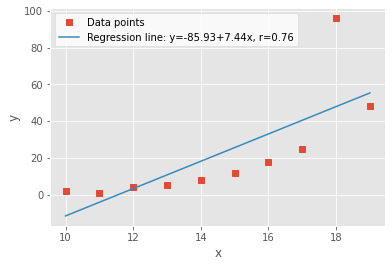

In [29]:
# Example 25
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

## Heatmaps of Correlation Matrices ##
The correlation matrix can become really big and confusing when you have a lot of features! Fortunately, you can present it visually as a heatmap where each field has the color that corresponds to its value. You’ll need the correlation matrix:

In [30]:
# Example 26
corr_matrix = np.corrcoef(xyz).round(decimals=2)
corr_matrix

array([[ 1.  ,  0.76, -0.97],
       [ 0.76,  1.  , -0.83],
       [-0.97, -0.83,  1.  ]])

It can be convenient for you to round the numbers in the correlation matrix with _.round()_, as they’re going to be shown be on the heatmap.

Finally, create your heatmap with _.imshow()_ and the correlation matrix as its argument:

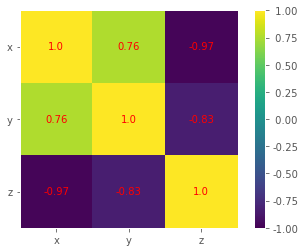

In [31]:
# Example 27
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()

In this heatmap, notice that the color gradiant goes from light (yellow) to dark (blue), which is high values to low values, so you might be able to visualize a pattern from this.



Now we've looked at different types of correlation and different ways to visualize it.  For simple relationships, the Pearson and a scatter plot works.  For larger data sets, a HeatMap might be better.

__Exercise__

Go back and look at the Titanic data - what was the correlation between surviviability and age? gender? class?  Generate some figures exploring the relationships within that dataset.